# Numerical integration 

# 1) 

In this exercise we will approximate integrals in 1D using numerical methods.

Given a function $f(x)$ on an inteval $[a,b]$, one can approximate its integral $\int_a^bf(x)\mathrm{d}x$ by using, for example, the rectangle rule/midpoint rule:
$$I=\int_a^bf(x)\mathrm{d}x \approx (b-a) f\left(\frac{a+b}{2}\right),$$
or the trapezoidal rule:
$$I=\int_a^bf(x)\mathrm{d}x \approx(b-a)\left(\frac{f(a)+f(b)}{2}\right).$$

## a)

Write function that accepts another function $f(x)$ and two interval boundaries $a$ and $b$ and returns an approximation to the integral $I$ using:

***i)*** the rectangle rule; and,

***ii)*** the trapezoidal rule.

**Hint:** Your solution should look something like this:

```python
def integrate_midpoint(f,a,b):
    ...
    return I 
```

```python
def integrate_trapezoid(f,a,b):
    ...
    return I
```

In [28]:
# Solution:

import math

def integrate_midpoint(f,a,b):
    I = (b-a)*f((a+b)/2)
    return I

def integrate_trapezoid(f,a,b):
    I = (b-a)*(f(a)+f(b))/2
    return I



## b)
To test our functions `integrate_midpoint` and `integrate_trapezoid`, we can use the following simple function
$$f(x)=x^n,$$ 
which has the indefinite integral
$$F(x) = \int x^n \mathrm{d}x = \frac{x^{n+1}}{n+1}$$
and the definite integral on the interval $[a,b]$ given by
$$I_{exact} = \int^b_a x^n \mathrm{d}x =  F(b)-F(a) $$

### i) 
For $n=0,1,2,3,4$ and on the interval $[0,1]$, compute the error of the numerical approximations for the two functions you created in Q1a). (***Hint:*** The error is given by the difference from the numerical solution and the exact solution $\mathrm{error} = I_{numerical} - I_{exact}$,where $I_{numerical}$ is calculated by the trapezoidal rule or midpoint rule above. Also use a `for` loop)

In [ ]:
# Solution:

def f(x,n):
    return x**n
def F(x,n):
    return x**(n+1)/(n+1)
a = 0
b = 1
for n in range(0,5):
    errorMP = integrate_midpoint(lambda y: f(y,n),a,b) - (F(b,n)-F(a,n))
    errorTP = integrate_trapezoid(lambda y: f(y,n),a,b) - (F(b,n)-F(a,n))
    print(errorTP,errorMP)

### ii) 
What do you notice about the errors for $n=0$ and $1$? Can you explain your observation?

In [35]:
# Solution: 

# The function f(x) for n = 0 and 1 corresponds to degree 0 and degree 1 polynomials. 
# The error is therefore zero for the midpoint and trapezoidal rule as these rules approximate f(x) with a degree 0 and 1 polynomial, which is the original function.
# Additionally, a straight line has the same area underneath it as a rectange of height equal to the midpoint of the line, therefore the midpoint rule is exact for $n = 1$

# 2)

Now we can subdivide the interval $[a,b]$ into $n$ sub-intervals of length $\Delta x = \frac{b-a}{n}$ and use a composite integration rule. For example, if we let $x_k = a + k \Delta x$ then the composite trapezoidal rule is calculated by summing smaller trapezoids with width $\Delta x$. This is given by the formula
$$\int_a^bf(x)\mathrm{d}x \approx \Delta x \sum_{k=0}^{n}\left(\frac{f(x_k)+f(x_{k+1})}{2}\right) .$$

## a) 
Write a function that accept $f(x)$, two interval boundaries $a$ and $b$, and an integer $n$ and computes an approximation to $I=\int^b_af(x)\mathrm{d}x$ using the composite trapezoidal rule with $n$ sub-intervals. The function should look like this
```python
def integrate_composite_trapezoidal(f,a,b,n):
    ...
    return I
```
***Hint:*** you can use your function `integrate_composite_trapezoidal` from before! Also recall that sums are best implemented using a `for` loop. 

In [30]:
# Solution:

def integrate_composite_trapezoidal(f,a,b,n):
    dx = (b-a)/n
    I = 0
    for k in range(0,n):
        I += integrate_trapezoid(f,a+dx*k,a+dx*(k+1))
    return I

## b)
The trapezoidal rule is approximating the function with a straight line (a degree 1 polynomial) and then finding the area underneath the line (which is equivalent to finding the area of a trapezoid). We can make a more accurate numerical method by approximating the function with a parabola (a degree 2 polynomial) and compute the area underneath the parabola. This gives us the Simpson rule, or composite Simpson rule if we divide the interval up, which is what we will do. The *composite* Simpson rule is given by the following formula
$$\qquad\qquad\quad\qquad\qquad\int_a^bf(x)\mathrm{d}x \approx \frac{\Delta x}{3} \left(f(x_0) + 4f(x_1)+ 2f(x_2)+ 4f(x_3)+ 2f(x_4)+...+ 4f(x_{n-1}) +f(x_n)\right)\\
\approx \frac{\Delta x}{3} \left(f(x_0) + \sum_{k=1}^{n-1} c_k f(x_k) +f(x_n)\right)$$
where $c_k = 2$ if $k$ is even and $c_k = 4$ if $k$ is odd. Now write a function, similar to the previous question, that accept $f(x)$, two interval boundaries $a$ and $b$, and an integer $n$ and computes an approximation to $I=\int^b_af(x)\mathrm{d}x$ using the composite *Simpson* rule with $n$ sub-intervals,
```python
def integrate_composite_simpson(f,a,b,n):
    ...
    return I
```

In [31]:
# Solution:

def integrate_composite_simpson(f,a,b,n):
    dx = (b-a)/n
    I = f(a)
    for k in range(1,n):
        if k%2==0: # then k is even 
            I += 2*f(a+dx*k)
        else:      # then k is odd
            I += 4*f(a+dx*k)
    I += f(b)
    I = dx*I/3
    return I


## c)
### i)
Using the simple function $f(x) = 5x^4 - 3x^2 + \exp(x)$, which has the indefinite integral $F(x) = \int f(x)\mathrm{d}x = x^5 - x^3 + \exp(x)$, calculate the error of integral using the composite trapezoidal and Simpson functions that you created above. Try the functions on the interval $[0,10]$ with $n=10$ subintervals. The error for this integral on this interval for the composite trapezoidal rule is about `0.0130816` and the Simpson rule is about `6.762013-05`

In [46]:
# Solution:

def f(x):
    return 5*x**4 - 3*x**2 + math.exp(x)

def F(x):
    return x**5-x**3 + math.exp(x)

a = 0
b = 1
n = 10
I1 = integrate_composite_simpson(f,a,b,n)   
I2 = integrate_composite_trapezoidal(f,a,b,n)
Ie = F(b) - F(a)                             
error1 = I1 - Ie                               
error2 = I2 - Ie 
print(error1,error2)

6.762013244521192e-05 0.013081662930269466


### ii) 
What do you expect is the error of the Simpson rule when used to integrate the function $f(x) = -4 x^2 + 2x +17$ ? 

***Solution***
The error will be zero as the function is a parabola, so the Simpson rule will approximate the function exactly and therefore integrate it exactly

## d) Optional bonus question!!

### i) 
Now we will look at how the error of the composite methods changes as you increase the number of sub-intervals $n$ (which is the same as decreasing $\Delta x$). Compute the error of the composite trapezoidal and Simpsons rule when integrating the function from Q2ci) on the interval $[0,1]$ then make a log-log plot of the error as a function of the step size $\Delta x = \frac{b-a}{2^i}$ for $i = 1,2,...,10$. In other words make a log-log plot with error on the vertical axis and $\Delta x$ on the horizontal axis for the different values of $i$. Also plot the points $(\Delta x, \Delta x^2)$ and $(\Delta x, \Delta x^4)$ for $i = 1,2,...,10$.

***Hint:*** The following code is used to make a log-log plot of the points $(\Delta x, \Delta x^2)$ and $(\Delta x, \Delta x^4)$ for $i = 1,2,...,10$. You therefore only need to add error plots on top. 
```python
import matplotlib.pyplot as plt
a = 0
b = 1

# add functions for f and F here

for i in range(1,10):
    n = 2**i
    dx = (b-a)/n
    # compute the numerical integrals and errors here then add the points (dx,error) to the following plot
    plt.loglog(dx,dx**2,'kx',dx,dx**4,'kx')
```
Recall that for a log-log plot, you can only plot positive numbers, therefore take the absolute value of the error when you plot it.

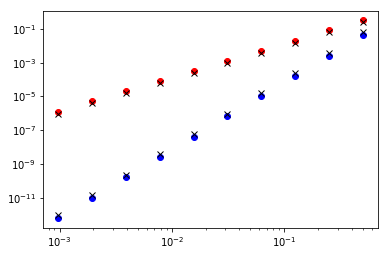

In [33]:
# Solution:

import matplotlib.pyplot as plt

def f(x):
    return 5*x**4 - 3*x**2 + math.exp(x)

def F(x):
    return x**5-x**3 + math.exp(x)

for i in range(1,11):
    a = 0
    b = 1
    n = 2**i
    I1 = integrate_composite_trapezoidal(f,a,b,n)
    I2 = integrate_composite_simpson(f,a,b,n)
    Ie = F(b) - F(a)
    plt.loglog(1/n,abs(I1 - Ie),'ro',1/n,abs(I2 - Ie),'bo')
    plt.loglog(1/n,1/n**2,'kx',1/n,1/n**4,'kx')
    
    

### ii) 
How does the error of the 2 methods vary in terms of $\Delta x$?

***Answer:*** As the two error lines have the same slope as the $\Delta x^2$ and $\Delta x^4$ lines, we can conclude that the composite trapezoidal rule has error proportional to $\Delta x^2$ and the simpson rule as error proportional to $\Delta x^4$.